In [2]:
#Module 5: Diabetes Dataset Clustering Analysis using K-Means

Name: Srinivasa Reddy Julakanti Registration Number: 21BDS0220

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

# Load the dataset
data = pd.read_csv('bank_marketing_test.csv')
summary = data.describe()
print(summary)

               age     duration    campaign        pdays     previous  \
count  8237.000000  8237.000000  8237.00000  8237.000000  8237.000000   
mean     40.116547   256.007648     2.60471   962.228724     0.174335   
std      10.465328   259.728737     2.91562   187.533881     0.500565   
min      17.000000     4.000000     1.00000     0.000000     0.000000   
25%      32.000000   101.000000     1.00000   999.000000     0.000000   
50%      38.000000   179.000000     2.00000   999.000000     0.000000   
75%      47.000000   316.000000     3.00000   999.000000     0.000000   
max      89.000000  4918.000000    43.00000   999.000000     6.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx    euribor3m  nr.employed  
count   8237.000000     8237.000000    8237.000000  8237.000000  8237.000000  
mean       0.070147       93.577806     -40.545320     3.608206  5166.589790  
std        1.574685        0.582138       4.623626     1.735931    72.470977  
min       -3.400000       

In [4]:
# Select numerical columns for clustering
numerical_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
                      'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

In [5]:
# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Cluster Means Analysis
cluster_means = data.groupby('KMeans_Cluster')[numerical_columns].mean()
print("Cluster Means:\n", cluster_means)


Cluster Means:
                       age    duration  campaign       pdays  previous  \
KMeans_Cluster                                                          
0               33.839130  242.549689  3.173602  999.000000  0.021739   
1               39.622393  266.621295  2.092938  888.174899  0.474204   
2               49.557793  262.280648  2.415061  999.000000  0.030648   

                emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
KMeans_Cluster                                                           
0                   1.143199       93.882278     -39.701056   4.828212   
1                  -2.033882       93.031685     -42.674680   1.179470   
2                   1.075000       93.802039     -39.187609   4.794423   

                nr.employed  
KMeans_Cluster               
0               5214.562267  
1               5072.299634  
2               5211.784019  


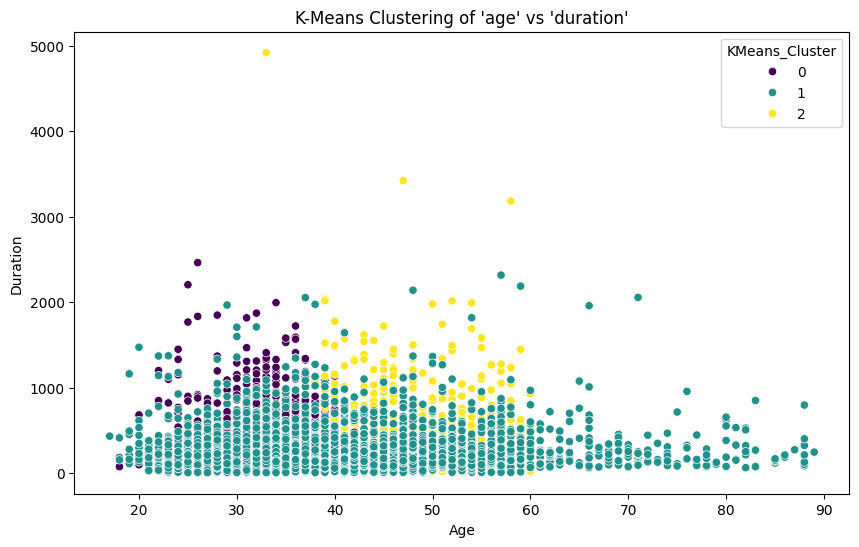

In [6]:
# Visualizing K-Means Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='duration', hue='KMeans_Cluster', palette='viridis')
plt.title("K-Means Clustering of 'age' vs 'duration'")
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

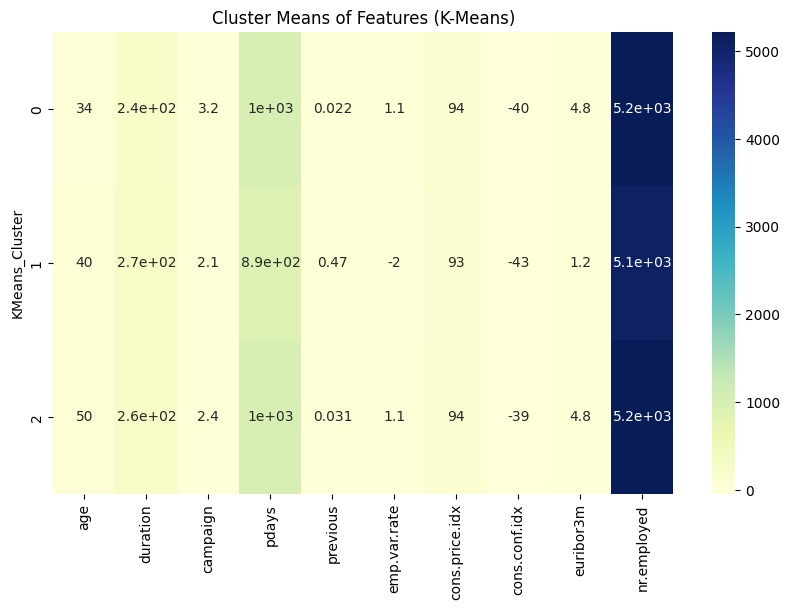

In [7]:
# Heatmap of Cluster Means
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu")
plt.title("Cluster Means of Features (K-Means)")
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


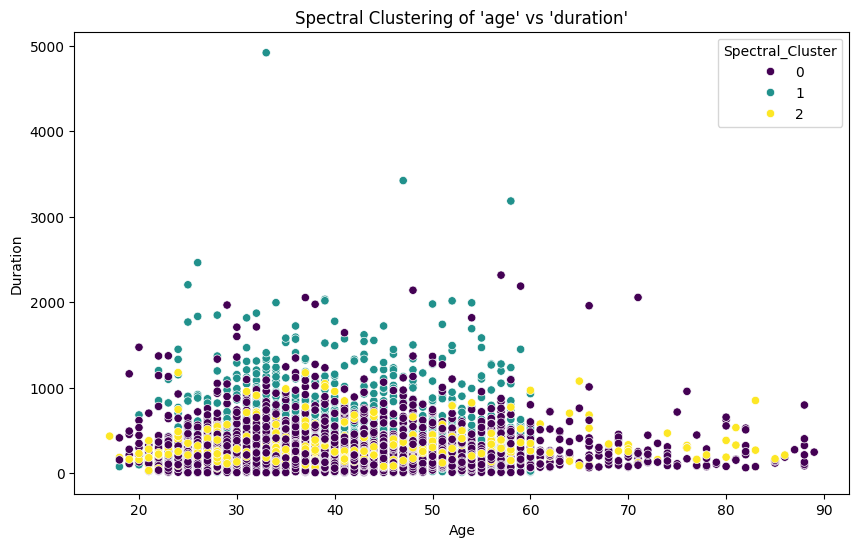

In [8]:
# Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data['Spectral_Cluster'] = spectral.fit_predict(scaled_data)

# Visualizing Spectral Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='duration', hue='Spectral_Cluster', palette='viridis')
plt.title("Spectral Clustering of 'age' vs 'duration'")
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

In [9]:
# Minimum Spanning Tree (MST) Clustering
# Compute pairwise distances
pairwise_distances = euclidean_distances(scaled_data)

# Flatten distance matrix and select smallest 30 distances
distances_flat = pairwise_distances[np.triu_indices(len(pairwise_distances), k=1)]
sorted_indices = np.argsort(distances_flat)[:30]


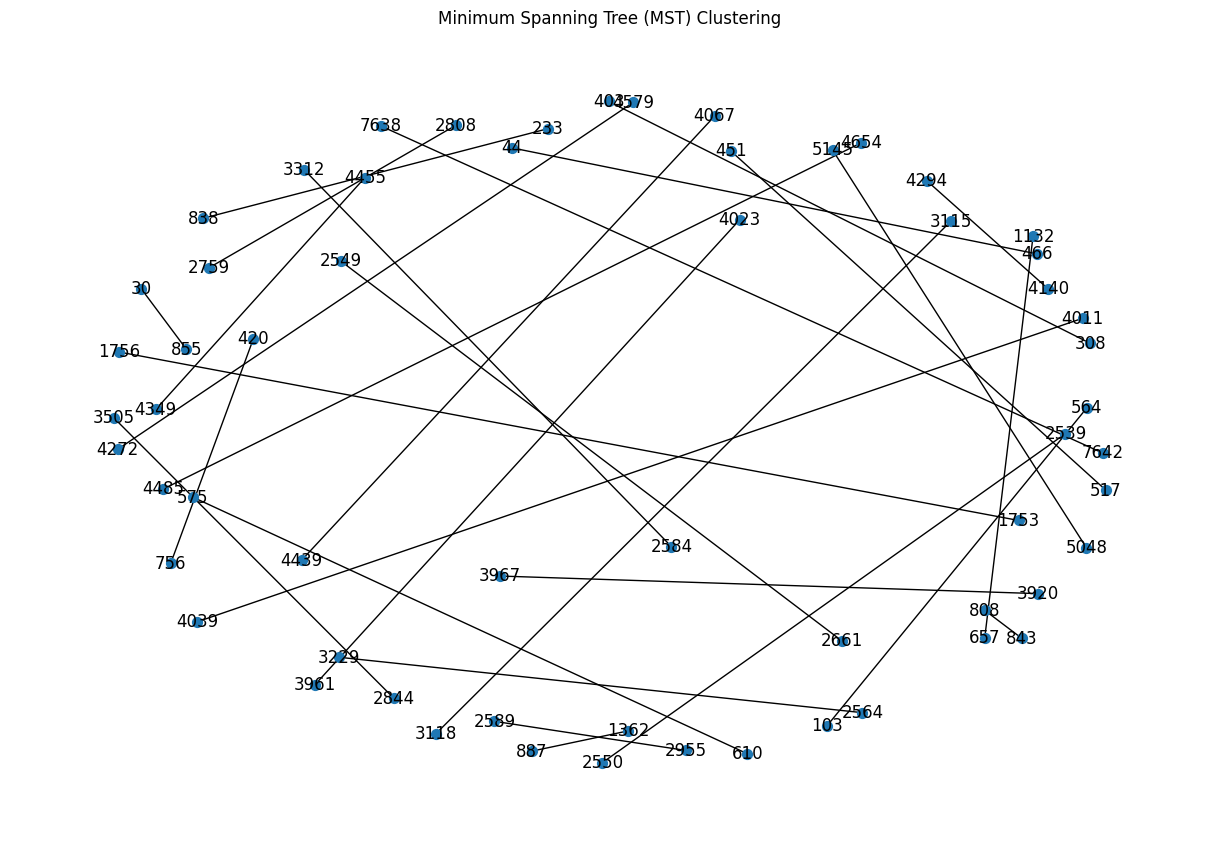

In [10]:
# Create graph and compute MST
G = nx.Graph()
for idx in sorted_indices:
    i, j = np.triu_indices(len(pairwise_distances), k=1)[0][idx], np.triu_indices(len(pairwise_distances), k=1)[1][idx]
    G.add_edge(i, j, weight=pairwise_distances[i][j])

mst = nx.minimum_spanning_tree(G)

# Visualizing MST
plt.figure(figsize=(12, 8))
nx.draw(mst, with_labels=True, node_size=50, font_size=12)
plt.title("Minimum Spanning Tree (MST) Clustering")
plt.show()

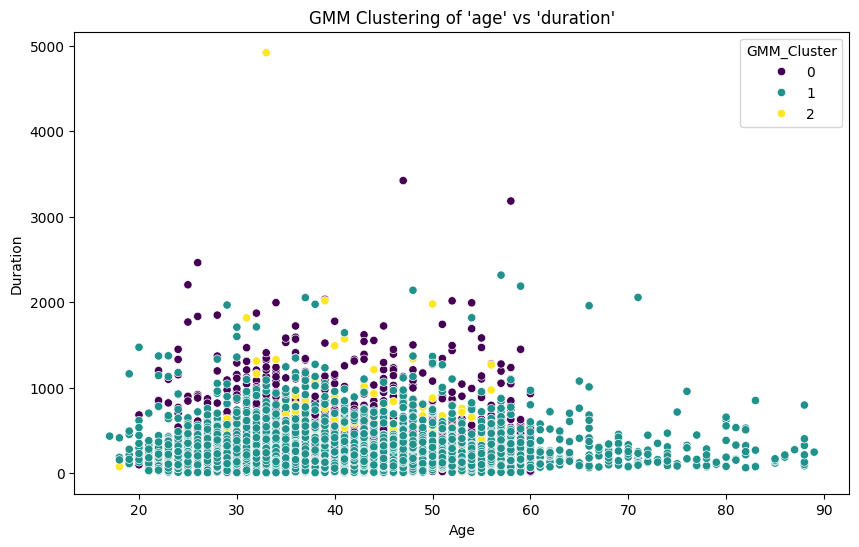

In [11]:
# Expectation-Maximization (GMM Clustering)
gmm = GaussianMixture(n_components=3, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(scaled_data)

# Visualizing GMM Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='duration', hue='GMM_Cluster', palette='viridis')
plt.title("GMM Clustering of 'age' vs 'duration'")
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

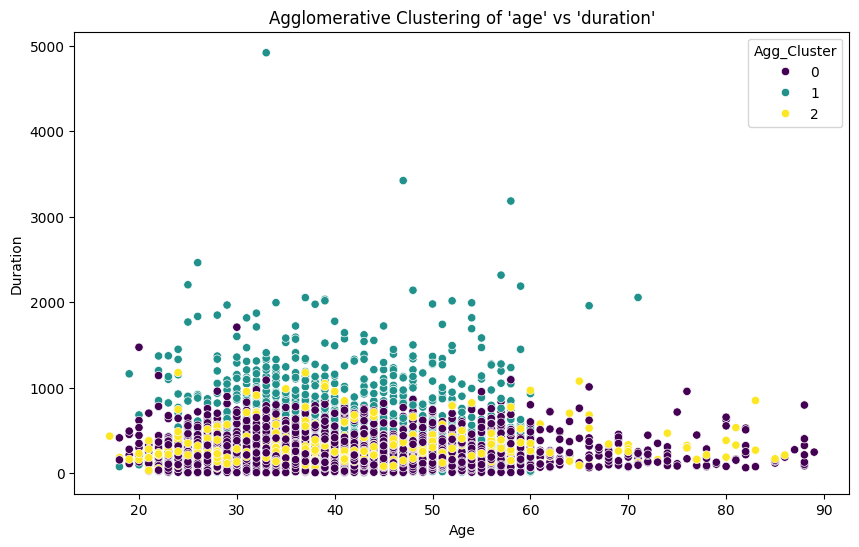

In [12]:
# Hierarchical Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['Agg_Cluster'] = agg_clustering.fit_predict(scaled_data)

# Visualizing Agglomerative Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='duration', hue='Agg_Cluster', palette='viridis')
plt.title("Agglomerative Clustering of 'age' vs 'duration'")
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

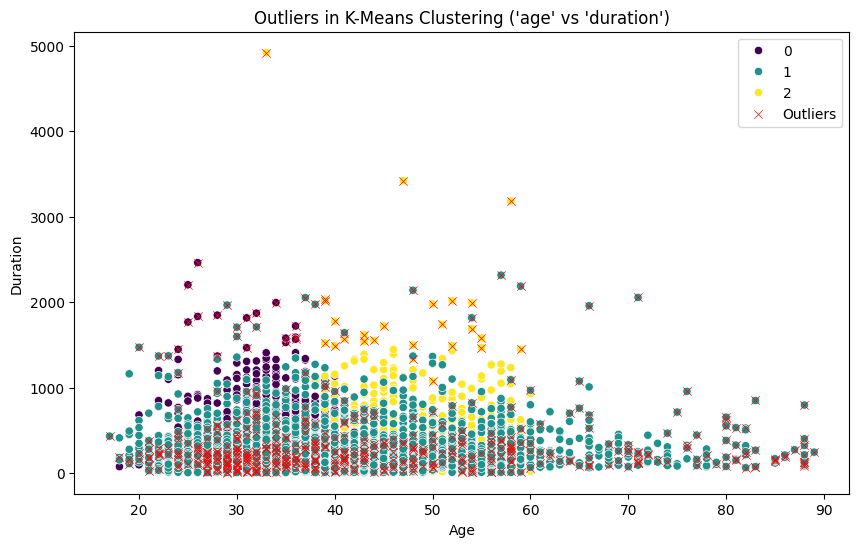

In [13]:
# Outlier Detection using K-Means
distances_to_centroid = kmeans.transform(scaled_data).min(axis=1)
outlier_threshold = distances_to_centroid.mean() + 2 * distances_to_centroid.std()
outliers = data[distances_to_centroid > outlier_threshold]

# Visualizing Outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='age', y='duration', hue='KMeans_Cluster', palette='viridis')
sns.scatterplot(data=outliers, x='age', y='duration', color='red', marker='x', label='Outliers')
plt.title("Outliers in K-Means Clustering ('age' vs 'duration')")
plt.xlabel("Age")
plt.ylabel("Duration")
plt.legend()
plt.show()
